# Machine Learning Algorithms - (6) K Means

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from tqdm import tqdm

## 1. What is K-Means?

K-Means is an **unsupervised learning algorithm** used to **cluster data** into $k$ groups based on feature similarity.

Given a dataset $X = \{x_1, x_2, ..., x_n\}$, the goal is to minimize the Within-Cluster Sum of Squares (WCSS):

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $C_i$ is the set of points assigned to cluster $i$
- $\mu_i$ is the centroid of cluster $i$

K-Means Algorithm Steps:
1. Initialize $k$ centroids randomly
2. Assign each point to the nearest centroid
3. Update centroids by computing the mean of points in each cluster
4. Repeat steps 2-3 until convergence (no change in assignments or max iterations reached)

Assumptions and Limitations:
- Assumes spherical clusters of similar size
- Sensitive to outliers and initial centroid positions
- The number of clusters $k$ must be predefined

## 3. Generating a Dataset

In [3]:

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

## 4. Implement K-Means

In [4]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tolerance=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        return X[indices]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[labels == i]
            if len(points) > 0:
                centroids[i] = points.mean(axis=0)
        return centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for _ in tqdm(range(self.max_iters), desc="Training"):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            if np.all(np.abs(self.centroids - new_centroids) < self.tolerance):
                break

            self.centroids = new_centroids
        self.labels_ = self._assign_clusters(X)

    def predict(self, X):
        return self._assign_clusters(X)

In [5]:
model = KMeans(n_clusters=4, max_iters=100, random_state=42)
model.fit(X)

Training:   5%|▌         | 5/100 [00:00<00:00, 5352.61it/s]


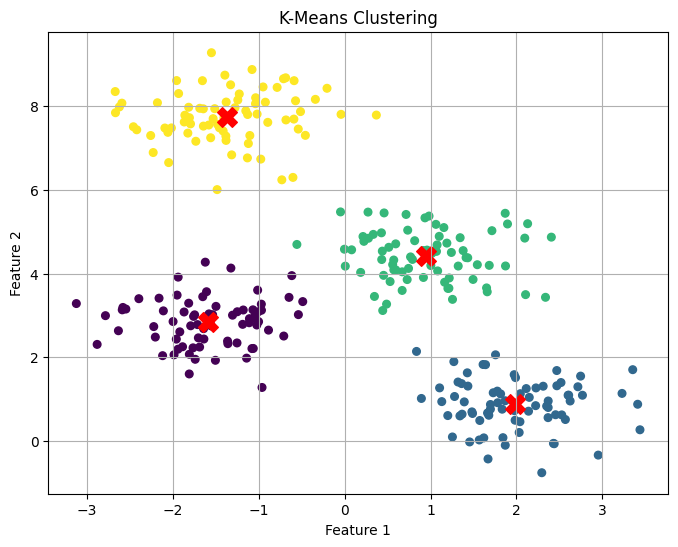

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', s=30)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 5. Choosing the Right Number of Clusters: Elbow Method

Training:  12%|█▏        | 12/100 [00:00<00:00, 6265.61it/s]


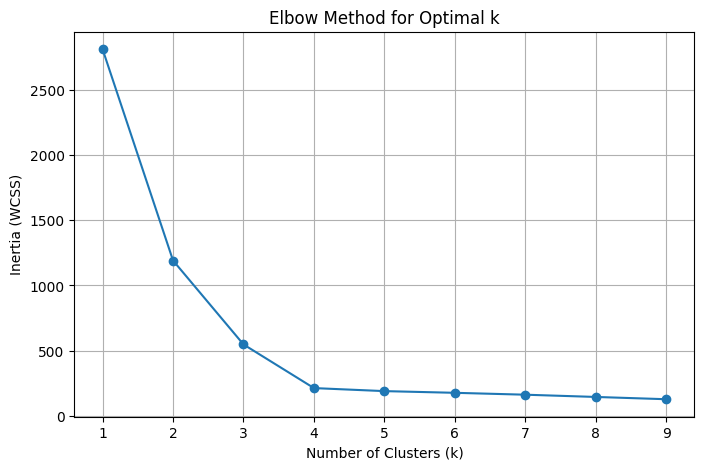

In [7]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, max_iters=100, random_state=42)
    kmeans.fit(X)
    inertia = np.sum((X - kmeans.centroids[kmeans.labels_])**2)
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

## 6. Summary and Takeaways

K-Means is an unsupervised clustering algorithm that partitions data into $k$ distinct, non-overlapping subsets (clusters) by minimizing the within-cluster variance.

The algorithm follows an iterative approach:
  1. Randomly initialize centroids
  2. Assign each data point to the nearest centroid
  3. Update centroids as the mean of assigned points
  4. Repeat until convergence

It works well when:
  - Clusters are roughly spherical and equally sized
  - The number of clusters ($k$) is known or can be estimated (e.g., via the Elbow Method)

Limitations:
  - Sensitive to initialization (may converge to local minima)
  - Not ideal for non-convex or differently sized/dense clusters
  - Requires choosing $k$ in advance
  - Sensitive to outliers

Despite its simplicity, K-Means is widely used in practice for tasks like customer segmentation, image compression, and pattern recognition.